In [8]:
import pandas as pd
import pymc3 as pm
import numpy as np
%matplotlib inline

In [9]:
data = pd.read_csv('http://www.jtash.com/step-data.txt')
data

,date,actual,goal
0,2018-07-29,9250.0,7140.0
1,2018-07-30,6392.0,7360.0
2,2018-07-31,5668.0,7270.0
3,2018-08-01,10286.0,6950.0
4,2018-08-02,5396.0,7290.0
5,2018-08-03,7667.0,7100.0
6,2018-08-04,4581.0,7160.0
7,2018-08-05,7215.0,6910.0
8,2018-08-06,7395.0,6940.0
9,2018-08-07,4319.0,7040.0


In [10]:
with pm.Model() as model:

    # parameterize the priors with sample mean and standard deviation
    alpha = 1 / data.actual.mean()
    beta = 1 / data.actual.std()

    # normal distribution priors - mu and std for before and after
    mu = pm.Exponential('mu', lam=alpha, shape=[2,])
    sd = pm.Exponential('sd', lam=beta, shape=[2,])

    t = np.arange(data.shape[0])
    tau = pm.DiscreteUniform('tau', lower=0, upper=t.max())
    _mu = pm.math.switch(tau > t, mu[0], mu[1])
    _sd = pm.math.switch(tau > t, sd[0], sd[1])

    observation = pm.Normal('observation', mu=_mu, sd=_sd, observed=data.actual)

    start = pm.find_MAP()
    trace = pm.sample(draws=5000, tune=5000, start=start)

/Users/peadarcoyle/Code/pymc3/pymc3/tuning/starting.py:61: UserWarning: find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.
  warnings.warn('find_MAP should not be used to initialize the NUTS sampler, simply call pymc3.sample() and it will automatically initialize NUTS in a better way.')
logp = -1,139.2, ||grad|| = 0.10198: 100%|██████████| 14/14 [00:00<00:00, 98.31it/s]  
Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [sd, mu]
>Metropolis: [tau]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:21<00:00, 1867.05draws/s]
The acceptance probability does not match the target. It is 0.8793619756383884, but should be close to 0.8. Try to increase the number of tuning steps.
The acceptance probability does not match the target. It is 0.8880913169636945, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for s

/Users/peadarcoyle/miniconda3/envs/ppp/lib/python3.5/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c22676048>,
      dtype=object)

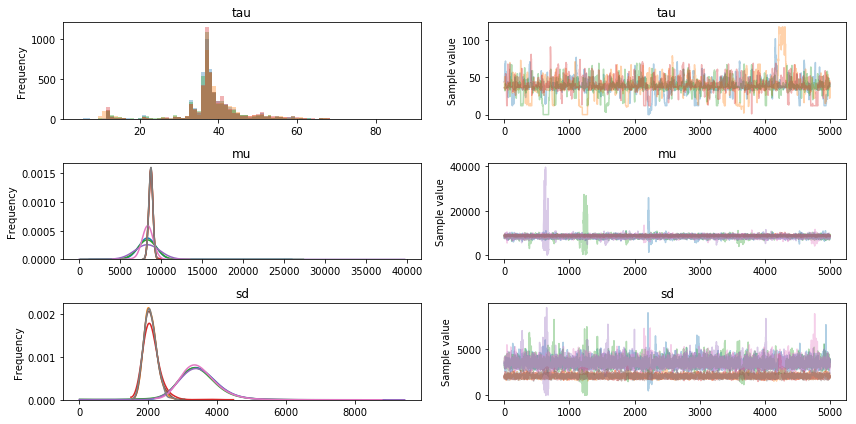

In [4]:
pm.traceplot(trace)

In [5]:
with pm.Model() as model2:

    # parameterize the priors with sample mean and standard deviation
    alpha = 1 / data.actual.mean()
    beta = 1 / data.actual.std()

    # normal distribution priors - mu and std for before and after
    mu = pm.Exponential('mu', lam=alpha, shape=[2,])
    sd = pm.Exponential('sd', lam=beta, shape=[2,])

    t = np.arange(data.shape[0])
    tau = pm.DiscreteUniform('tau', lower=0, upper=t.max())
    _mu = pm.math.switch(tau > t, mu[0], mu[1])
    _sd = pm.math.switch(tau > t, sd[0], sd[1])

    observation = pm.Normal('observation', mu=_mu, sd=_sd, observed=data.actual)

    trace2 = pm.sample(draws=5000, tune=5000)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [sd, mu]
>Metropolis: [tau]
Sampling 4 chains: 100%|██████████| 40000/40000 [00:20<00:00, 1948.49draws/s]
There were 2 divergences after tuning. Increase `target_accept` or reparameterize.
There were 27 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.6544112413456672, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c2342f0f0>,
      dtype=object)

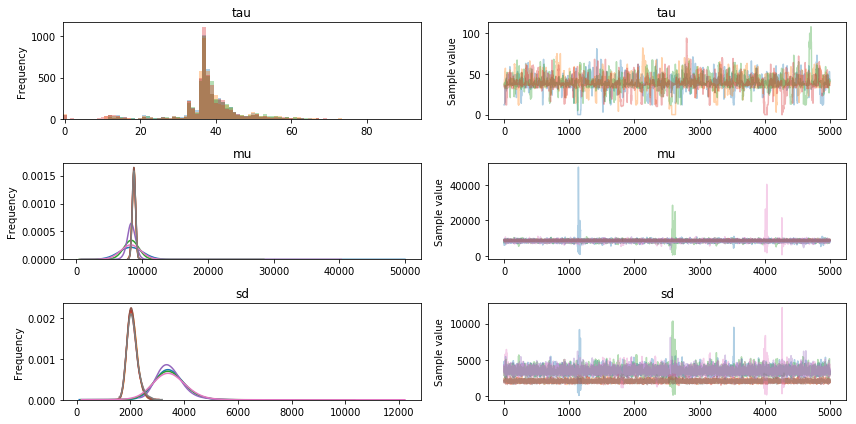

In [6]:
pm.traceplot(trace2)

In [12]:
with pm.Model() as model3:

    # parameterize the priors with sample mean and standard deviation and a derived metric
    alpha = 1 / data.actual.mean()
    beta = 1 / data.actual.std()
    gamma = (alpha+beta/2)

    # normal distribution priors - mu and std for before and after
    mu = pm.Exponential('mu', lam=alpha, shape=[2,])
    sd = pm.Exponential('sd', lam=beta, shape=[2,])
    nu = pm.Exponential('nu', lam=gamma, testval=.1)


    t = np.arange(data.shape[0])
    tau = pm.DiscreteUniform('tau', lower=0, upper=t.max())
    _mu = pm.math.switch(tau > t, mu[0], mu[1])
    _sd = pm.math.switch(tau > t, sd[0], sd[1])
    
    # StudentT has other parameters too. 
    observation = pm.StudentT('observation', nu=nu, mu=_mu, sd=_sd, observed=data.actual)

    trace3 = pm.sample(draws=8000, tune=8000, target_accept=0.99)

Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [nu, sd, mu]
>Metropolis: [tau]
Sampling 4 chains: 100%|██████████| 64000/64000 [00:44<00:00, 1440.54draws/s]
There were 76 divergences after tuning. Increase `target_accept` or reparameterize.
There were 78 divergences after tuning. Increase `target_accept` or reparameterize.
There were 689 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.7112239827823811, but should be close to 0.8. Try to increase the number of tuning steps.
There were 9 divergences after tuning. Increase `target_accept` or reparameterize.
The acceptance probability does not match the target. It is 0.8905256354254103, but should be close to 0.8. Try to increase the number of tuning steps.
The number of effective samples is smaller than 10% for some parameters.


/Users/peadarcoyle/miniconda3/envs/ppp/lib/python3.5/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c243a31d0>,
      dtype=object)

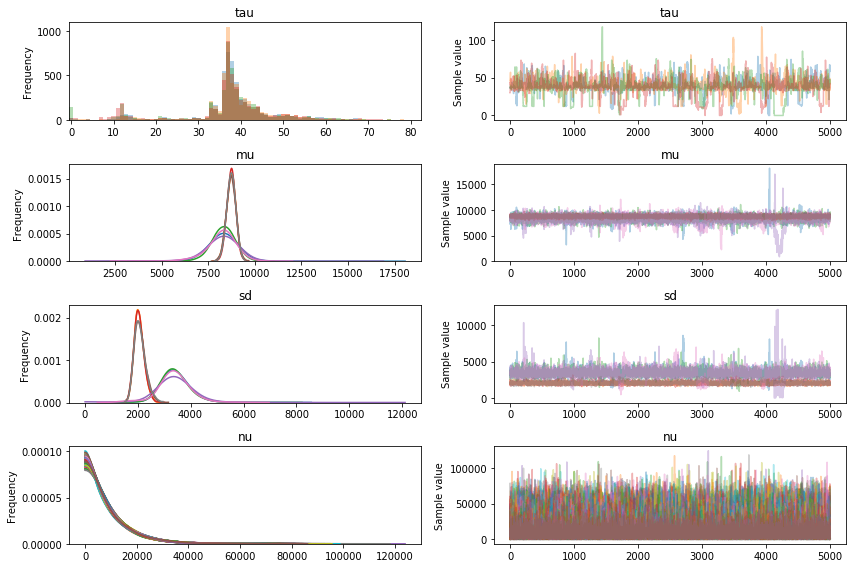

In [10]:
pm.traceplot(trace3)

In [15]:

import theano.tensor as tt
with pm.Model() as marginal:
    # parameterize the priors with sample mean and standard deviation and a derived metric
    alpha = 1 / data.actual.mean()
    beta = 1 / data.actual.std()
    gamma = (alpha+beta/2)

    # normal distribution priors - mu and std for before and after
    mu = pm.Exponential('mu', lam=alpha, shape=[2,])
    sd = pm.Exponential('sd', lam=beta, shape=[2,])
    nu = pm.Exponential('nu', lam=gamma, testval=.1)
    Z_latent = pm.Uniform('Z_latent', 0., 1., shape=[2,])
    lam = pm.Deterministic('lambda', Z_latent.mean())
    Z = pm.Deterministic('Z',
                         pm.theanof.tt_rng().binomial(
                             n=1, p=Z_latent, size=(2,)))

    tau = pm.DiscreteUniform('tau', lower=0, upper=t.max())
    mix_logp = pm.math.logsumexp(
    tt.log(1. - Z_latent) + tau, axis=0)
    tau_marginal = pm.Potential('tau_marginal', mix_logp)
    _mu = pm.math.switch(tau_marginal > t, mu[0], mu[1])
    _sd = pm.math.switch(tau_marginal > t, sd[0], sd[1])

       # StudentT has other parameters too. 
    observation = pm.StudentT('observation', nu=nu, mu=_mu, sd=_sd, observed=data.actual)

    trace_marginal = pm.sample(draws=8000, tune=8000, target_accept=0.99)


Multiprocess sampling (4 chains in 4 jobs)
CompoundStep
>NUTS: [Z_latent, nu, sd, mu]
>Metropolis: [tau]
Sampling 4 chains: 100%|██████████| 64000/64000 [05:49<00:00, 182.89draws/s]
There were 323 divergences after tuning. Increase `target_accept` or reparameterize.
There were 1012 divergences after tuning. Increase `target_accept` or reparameterize.
There were 295 divergences after tuning. Increase `target_accept` or reparameterize.
There were 399 divergences after tuning. Increase `target_accept` or reparameterize.
The number of effective samples is smaller than 10% for some parameters.


/Users/peadarcoyle/miniconda3/envs/ppp/lib/python3.5/site-packages/matplotlib/axes/_base.py:3455: MatplotlibDeprecationWarning: 
The `ymin` argument was deprecated in Matplotlib 3.0 and will be removed in 3.2. Use `bottom` instead.
  alternative='`bottom`', obj_type='argument')


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1c29a9e5c0>,
      dtype=object)

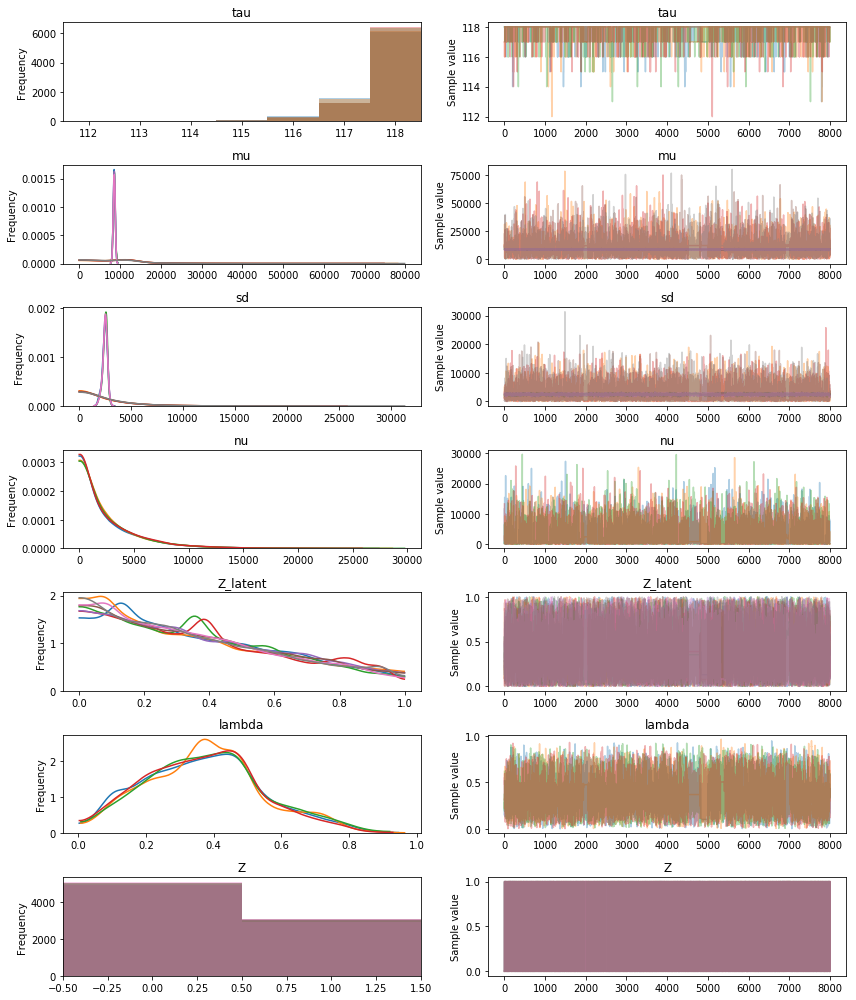

In [16]:
pm.traceplot(trace_marginal)